In [1]:
import numpy as np
import pysensmcda
import pandas as pd
import pymcdm
import matplotlib.pyplot as plt
from tqdm import tqdm

# DATA

https://versus.com/en/drone?filter[]=median_price%3D11955,Infinity&sort=versusScore

In [2]:
df = pd.DataFrame({
    'Price': [23590, 13284, 20598, 16328, 23324, 15750], # EUR
    'Maximum flight distance': [22.5, 7.0, 30.0, 7.0, 32.0, 32.0],  # KM
    'Maximum flight time': [32, 30, 46, 30, 45, 45], # min
    'Battery power': [3350, 5870, 5000, 5870, 5000, 5000], # mAh
    'Megapixels': [48, 20, 20, 20, 48, 20], # MP
    'Maximum ISO': [6400, 12800, 6400, 6400, 25600, 6400], # ISO light sensitivity level
    'Weight': [898, 1390, 899, 1380, 920, 915], # grams
    'Width': [440, 300, 283, 225, 347, 347], # mm
})

criteria_types = np.array([-1, 1, 1, 1, 1, 1, -1, -1])

In [3]:
df['Price'] = np.round(df['Price'] / 4.30697, 2)

In [4]:
df

,Price,Maximum flight distance,Maximum flight time,Battery power,Megapixels,Maximum ISO,Weight,Width
0,5477.17,22.5,32,3350,48,6400,898,440
1,3084.30,7.0,30,5870,20,12800,1390,300
2,4782.48,30.0,46,5000,20,6400,899,283
3,3791.06,7.0,30,5870,20,6400,1380,225
4,5415.41,32.0,45,5000,48,25600,920,347
5,3656.86,32.0,45,5000,20,6400,915,347


In [5]:
df.to_numpy()

array([[5.47717e+03, 2.25000e+01, 3.20000e+01, 3.35000e+03, 4.80000e+01,
        6.40000e+03, 8.98000e+02, 4.40000e+02],
       [3.08430e+03, 7.00000e+00, 3.00000e+01, 5.87000e+03, 2.00000e+01,
        1.28000e+04, 1.39000e+03, 3.00000e+02],
       [4.78248e+03, 3.00000e+01, 4.60000e+01, 5.00000e+03, 2.00000e+01,
        6.40000e+03, 8.99000e+02, 2.83000e+02],
       [3.79106e+03, 7.00000e+00, 3.00000e+01, 5.87000e+03, 2.00000e+01,
        6.40000e+03, 1.38000e+03, 2.25000e+02],
       [5.41541e+03, 3.20000e+01, 4.50000e+01, 5.00000e+03, 4.80000e+01,
        2.56000e+04, 9.20000e+02, 3.47000e+02],
       [3.65686e+03, 3.20000e+01, 4.50000e+01, 5.00000e+03, 2.00000e+01,
        6.40000e+03, 9.15000e+02, 3.47000e+02]])

In [6]:
matrix = df.to_numpy()

In [7]:
weights_1 = pysensmcda.criteria.generate_weights_scenarios(matrix.shape[1], 0.1, precision=2, return_array=True, save_zeros=False)
weights_05 = pysensmcda.criteria.generate_weights_scenarios(matrix.shape[1], 0.05, precision=2, return_array=True, save_zeros=False)
weights_04 = pysensmcda.criteria.generate_weights_scenarios(matrix.shape[1], 0.04, precision=2, return_array=True, save_zeros=False)
weights_02 = pysensmcda.criteria.generate_weights_scenarios(matrix.shape[1], 0.02, precision=2, return_array=True, save_zeros=False)

In [8]:
print(weights_1.shape)
print(weights_05.shape)
print(weights_04.shape)
print(weights_02.shape)

In [9]:
weights = weights_05

In [10]:
weights.shape

(50388, 8)

In [11]:
weights[0:5]

array([[0.05, 0.5 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.2 ],
       [0.1 , 0.45, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2 ],
       [0.15, 0.4 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.2 ],
       [0.2 , 0.35, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2 ],
       [0.25, 0.3 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.2 ]])

In [12]:
weights[-1]

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.65])

# MCDA EVALUATION

In [13]:
mairca = pymcdm.methods.MAIRCA()

In [14]:
preferences, rankings = [], []
for i in tqdm(range(len(weights))):
    w = weights[i]
    prefs = mairca(matrix, w, criteria_types)
    rank = mairca.rank(prefs)

    preferences.append(list(prefs))
    rankings.append(list(rank))

100%|██████████| 50388/50388 [00:20<00:00, 2434.83it/s]


In [15]:
rankings = np.array(rankings)
fuzzy_rank = pysensmcda.ranking.fuzzy_ranking(rankings, normalization_axis=1)
a = np.round(fuzzy_rank, 2)
for row in a:
    print(' & '.join([str(r) for r in row]))


0.0 & 0.01 & 0.02 & 0.01 & 1.0 & 0.11
0.12 & 0.11 & 0.7 & 0.02 & 0.17 & 1.0
0.03 & 0.1 & 1.0 & 0.06 & 0.07 & 0.73
1.0 & 0.9 & 0.31 & 0.4 & 0.03 & 0.13
0.2 & 1.0 & 0.08 & 0.85 & 0.02 & 0.04
1.0 & 0.21 & 0.0 & 0.87 & 0.0 & 0.0


In [17]:
fuzzy_rank = pysensmcda.ranking.fuzzy_ranking(rankings, normalization_axis=1)
positions = np.arange(1, fuzzy_rank.shape[0] + 1)
weighted_rank = (fuzzy_rank.T * positions).T
weighted_rank = np.sum(weighted_rank, axis=0)
rank_fr = pymcdm.helpers.rankdata(weighted_rank)
rank_fr

array([5., 4., 3., 6., 1., 2.])

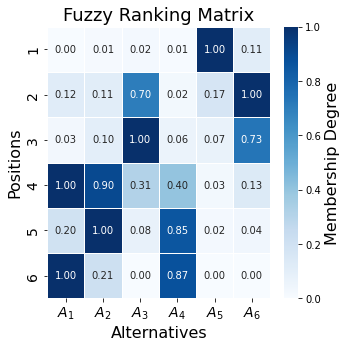

In [35]:
ax = pysensmcda.graphs.heatmap(fuzzy_rank, figsize=(5, 5))
plt.xlabel('Alternatives', fontsize=16)
plt.ylabel('Positions', fontsize=16)
plt.title('Fuzzy Ranking Matrix', fontsize=18)
x = np.arange(0, matrix.shape[0])
plt.yticks(x+0.5, x+1, fontsize=14)
plt.xticks(x+0.5, [f'$A_{{{i+1}}}$' for i in x], fontsize=14)
ax.figure.axes[-1].yaxis.label.set_size(16)
plt.savefig('img/heatmap_05.jpg', dpi=200)
plt.show()
plt.close()

In [43]:
preferences_1, rankings_1 = [], []
preferences_04, rankings_04 = [], []

for i in tqdm(range(len(weights_1))):
    w = weights_1[i]
    prefs = mairca(matrix, w, criteria_types)
    rank = mairca.rank(prefs)

    preferences_1.append(list(prefs))
    rankings_1.append(list(rank))

for i in tqdm(range(len(weights_04))):
    w = weights_04[i]
    prefs = mairca(matrix, w, criteria_types)
    rank = mairca.rank(prefs)

    preferences_04.append(list(prefs))
    rankings_04.append(list(rank))

100%|██████████| 346104/346104 [02:28<00:00, 2323.10it/s]


In [44]:
rankings_1 = np.array(rankings_1)
fuzzy_rank_1 = pysensmcda.ranking.fuzzy_ranking(rankings_1, normalization_axis=1)

rankings_04 = np.array(rankings_04)
fuzzy_rank_04 = pysensmcda.ranking.fuzzy_ranking(rankings_04, normalization_axis=1)

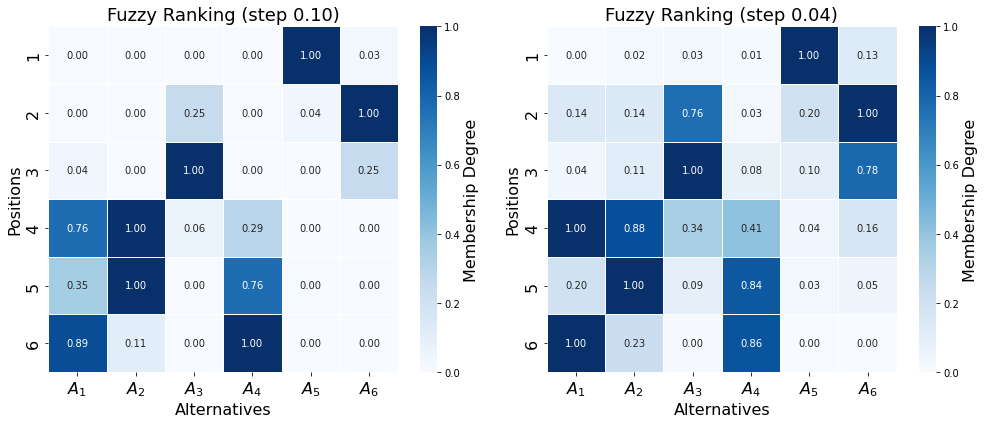

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax = pysensmcda.graphs.heatmap(fuzzy_rank_1, ax=axes[0])
axes[0].set_xlabel('Alternatives', fontsize=16)
axes[0].set_ylabel('Positions', fontsize=16)
axes[0].set_title('Fuzzy Ranking (step 0.10)', fontsize=18)
x = np.arange(0, matrix.shape[0])
axes[0].set_xticks(x + 0.5)
axes[0].set_xticklabels([f'$A_{{{i+1}}}$' for i in x], fontsize=16)
axes[0].set_yticks(x + 0.5)
axes[0].set_yticklabels(x + 1, fontsize=16)
axes[0].figure.axes[-1].yaxis.label.set_size(16)

ax = pysensmcda.graphs.heatmap(fuzzy_rank_04, ax=axes[1])
axes[1].set_xlabel('Alternatives', fontsize=16)
axes[1].set_ylabel('Positions', fontsize=16)
axes[1].set_title('Fuzzy Ranking (step 0.04)', fontsize=18)
axes[1].set_xticks(x + 0.5)
axes[1].set_xticklabels([f'$A_{{{i+1}}}$' for i in x], fontsize=16)
axes[1].set_yticks(x + 0.5)
axes[1].set_yticklabels(x + 1, fontsize=16)
axes[1].figure.axes[-1].yaxis.label.set_size(16)
plt.subplots_adjust(wspace=0.4) 
plt.tight_layout()
plt.savefig('img/heatmaps_01_004.jpg', dpi=200)
plt.show()
plt.close()

# COMPARATIVE ANALYSIS

In [42]:
weights_methods = {
    'Angle': pymcdm.weights.angle_weights, 
    'Entropy': pymcdm.weights.entropy_weights,
    'Gini': pymcdm.weights.gini_weights,
    'MEREC': pymcdm.weights.merec_weights,
    'IDOCRIW': pymcdm.weights.idocriw_weights
}

compromise = {
    'Borda': pysensmcda.compromise.borda,
    'DDG': pysensmcda.compromise.dominance_directed_graph,
    'Rank position': pysensmcda.compromise.rank_position
}

In [23]:
for k, m in weights_methods.items():
    w_obj = m(matrix, criteria_types)
    pref = mairca(matrix, w_obj, criteria_types)
    rank = mairca.rank(pref)
    print(k, rank)

Angle [4. 5. 3. 6. 1. 2.]
Entropy [3. 5. 4. 6. 1. 2.]
Gini [4. 5. 3. 6. 1. 2.]
MEREC [4. 5. 3. 6. 1. 2.]
IDOCRIW [2. 5. 4. 6. 1. 3.]


In [41]:
for name, m in compromise.items():
    print(name, m(np.array(rankings).T))

Borda [5. 4. 3. 6. 1. 2.]
DDG [5. 4. 3. 6. 1. 2.]
Improved borda [2. 3. 4. 1. 6. 5.]
Rank position [5. 4. 3. 6. 1. 2.]
